In [3]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
train = pd.read_csv('./data/raw/train.csv')
test = pd.read_csv('./data/raw/test.csv')

In [6]:
train.head()

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0


In [8]:
def summary(data):
    df_col = data.columns
    summary_df = pd.DataFrame(columns=('columns', 'data', 'dtypes', 'isnull', 'unique_cnt', 'unique_detail'),
                        data=np.zeros([len(df_col), 6]),
                        dtype=str,
                        )
    summary_df['columns'] = df_col

    for idx,cols in enumerate(df_col):
        summary_df['data'].loc[idx] = len(data[cols])
        summary_df['dtypes'].loc[idx] = data[cols].dtypes
        summary_df['isnull'].loc[idx] = data[cols].isnull().sum()
        summary_df['unique_cnt'].loc[idx] = len(data[cols].unique())
        summary_df['unique_detail'].loc[idx] = str(data[cols].unique())[1:-1]

    return summary_df

In [9]:
summary(train)

,columns,data,dtypes,isnull,unique_cnt,unique_detail
0,ID,14095,object,0,14095,'TRAIN_00000' 'TRAIN_00001' 'TRAIN_00002' ... ...
1,COMPONENT_ARBITRARY,14095,object,0,4,'COMPONENT3' 'COMPONENT2' 'COMPONENT1' 'COMPON...
2,ANONYMOUS_1,14095,int64,0,2951,1486 1350 2415 ... 1941 7021 1637
3,YEAR,14095,int64,0,16,2011 2021 2015 2010 2008 2009 2014 2018 2013 2...
4,SAMPLE_TRANSFER_DAY,14095,int64,0,107,7 51 2 4 6 5 22 3 13 1 32 ...
5,ANONYMOUS_2,14095,int64,0,842,200 375 550 616 370 1485 1264 1243 571 ...
6,AG,14095,int64,0,4,0 1 2 3
7,AL,14095,int64,0,328,3 2 110 8 1 0 5 7 25 ...
8,B,14095,int64,0,504,93 19 1 3 157 8 21 6 2 ...
9,BA,14095,int64,0,38,0 1 3 2 4 6 11 7 5 28 10 4...


### 결측

In [12]:
# 데이터수 14095
# 결측있는 컬럼 : 19개
# CD 1394 : Cadmium 함유량
# FH2O 10205 : Water 수치
# FNOX 10205 : NOx 수치
# FOPTIMETHGLY 10205 : 비식별화
# FOXID 10205 : Oxidation 수치
# FSO4 10205 : SO4 수치
# FTBN 10205 : 염기성 첨가제물질 수치
# FUEL 10205 : 연료 함유량
# SOOTPERCENTAGE 10205 : Soot함유량
# U100 11779 : 100나노미터 이상 크기 입자
# U75 11779
# U50 11779
# U25 11779
# U20 11779
# U14 11977
# U6 11977
# U4 11977 
# V100 10371 : Viscosity @ 100 degrees
# K 2299 : K-Potassium 함유량

In [36]:
print(10205/14095)
print(11779/14095)
print(11977/14095)

0.724015608371763
0.8356864136218517
0.8497339482085846


In [10]:
train.Y_LABEL.value_counts()

0    12892
1     1203
Name: Y_LABEL, dtype: int64

In [7]:
train[train['CD']]

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,NaN,NaN,NaN,NaN,NaN,0,14.5,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,7.0,8.0,100.0,1625.0,18890.0,0,NaN,44.3,652,0


In [11]:
summary(test)

,columns,data,dtypes,isnull,unique_cnt,unique_detail
0,ID,6041,object,0,6041,'TEST_0000' 'TEST_0001' 'TEST_0002' ... 'TEST_...
1,COMPONENT_ARBITRARY,6041,object,0,4,'COMPONENT1' 'COMPONENT3' 'COMPONENT2' 'COMPON...
2,ANONYMOUS_1,6041,int64,0,2264,2192 2794 1982 ... 5916 8537 4131
3,YEAR,6041,int64,0,16,2016 2011 2010 2009 2013 2014 2021 2017 2020 2...
4,ANONYMOUS_2,6041,int64,0,629,200 473 375 1230 944 565 566 913 900 ...
5,AG,6041,int64,0,3,0 1 2
6,CO,6041,int64,0,6,0 1 3 13 2 6
7,CR,6041,int64,0,80,0 2 3 1 5 4 6 22 10 ...
8,CU,6041,int64,0,374,1 16 4 6 0 2 205 14 3 ...
9,FE,6041,int64,0,891,12 278 5 163 13 62 73 ...


In [15]:
## train에서 결측이 많은데 test에도 있는 컬럼, 모두 float
null_col = ['CD','FH2O','FNOX','FOPTIMETHGLY','FOXID','FSO4','FTBN','FUEL','SOOTPERCENTAGE','U100','U75','U50','U25','U20','U14','U6','U4','V100','K']

check = []
for i in null_col:
    if i in test.columns:
        check.append(i)
check

## 없음

[]

- null columns 분포부터보기

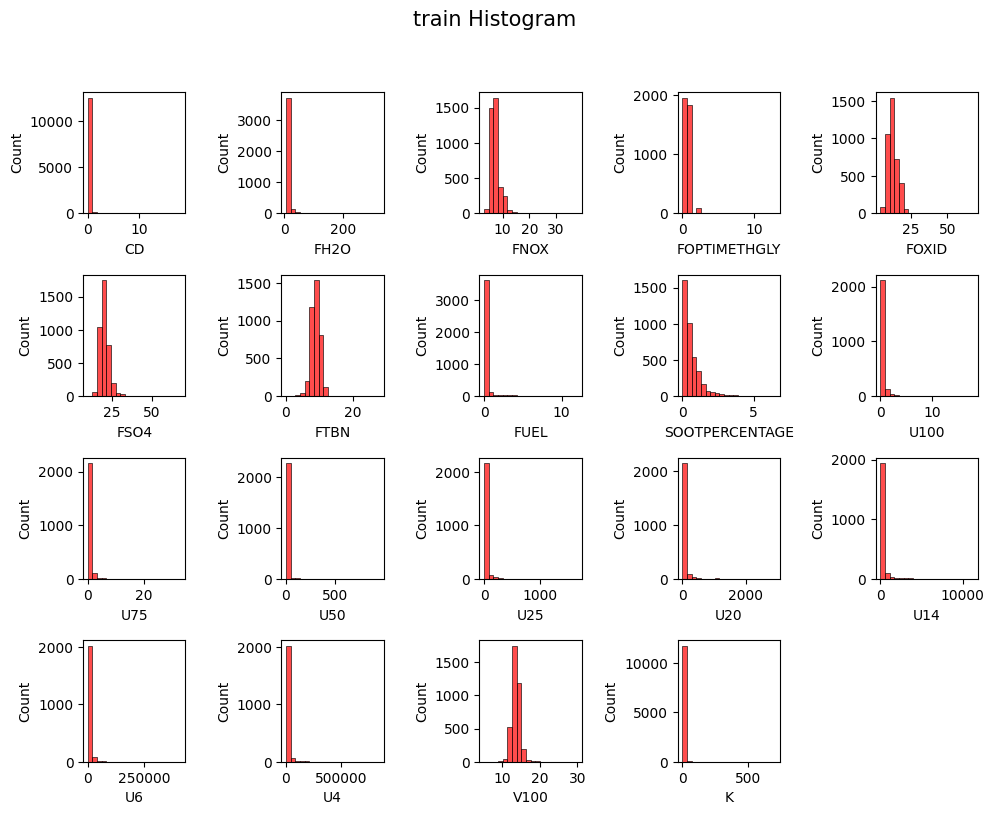

In [30]:
number_type=['int64','float64']

bins=20
plt.figure(figsize=(10,10))
plt.suptitle('train Histogram', fontsize=15)

# cols = train.columns

cols = null_col
subplot_size=int(np.sqrt(len(cols))) + 1

for i in range(len(cols)):
    plt.subplot(subplot_size,subplot_size,i+1)

    if (train[cols[i]].dtypes not in number_type) :
        sns.histplot(data=train, x=cols[i], color='b', bins= bins, alpha=0.7)
        plt.xticks(fontsize=10, rotation=0)

    else:
        sns.histplot(data=train, x=cols[i], color='r', bins=bins, alpha=0.7)
        plt.xticks(fontsize=10, rotation=0)

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [31]:
train[null_col]

,CD,FH2O,FNOX,FOPTIMETHGLY,FOXID,FSO4,FTBN,FUEL,SOOTPERCENTAGE,U100,U75,U50,U25,U20,U14,U6,U4,V100,K
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.0
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,2.0,4.0,6.0,216.0,1454.0,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,3.0,39.0,11261.0,41081.0,NaN,0.0
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
14091,0.0,13.0,8.0,0.0,16.0,21.0,9.1,0.0,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.5,4.0
14092,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,7.0,8.0,100.0,1625.0,18890.0,NaN,0.0


In [32]:
train[['CD','K']]

,CD,K
0,0.0,27.0
1,0.0,NaN
2,0.0,0.0
3,0.0,NaN
4,0.0,0.0
...,...,...
14090,0.0,1.0
14091,0.0,4.0
14092,0.0,NaN
14093,NaN,0.0


In [34]:
train.K.value_counts()

0.0      3729
2.0      2251
1.0      1754
3.0      1219
4.0       718
         ... 
183.0       1
391.0       1
113.0       1
115.0       1
71.0        1
Name: K, Length: 102, dtype: int64

In [33]:
train.CD.value_counts()

0.0     12543
1.0       138
2.0        16
3.0         2
4.0         1
18.0        1
Name: CD, dtype: int64

### 정리
- null_col 19개 중에 CD, K 를 제외한 변수는 결측이 73~80% 이다
- CD는 데이터 의 90% 이상 0으로 되어 있다
- K는 비교적 분포가 고른편이다

In [38]:
use_col = []
for i in train.columns:
    if i not in null_col:
        use_col.append(i)
train[use_col]

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,PQINDEX,S,SB,SI,SN,TI,V,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,8504,21370,0,427,2,5,0,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,19,1117,0,0,0,0,0,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,17,1334,0,0,1,0,0,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,44,21774,2,1,1,0,0,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,217,18470,0,2,0,0,0,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,35,22000,0,2,0,0,0,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,9,5494,0,5,0,0,0,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,645,9640,2,18,0,0,0,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,11,1313,0,0,0,0,0,44.3,652,0


In [39]:
summary(train[use_col])

,columns,data,dtypes,isnull,unique_cnt,unique_detail
0,ID,14095,object,0,14095,'TRAIN_00000' 'TRAIN_00001' 'TRAIN_00002' ... ...
1,COMPONENT_ARBITRARY,14095,object,0,4,'COMPONENT3' 'COMPONENT2' 'COMPONENT1' 'COMPON...
2,ANONYMOUS_1,14095,int64,0,2951,1486 1350 2415 ... 1941 7021 1637
3,YEAR,14095,int64,0,16,2011 2021 2015 2010 2008 2009 2014 2018 2013 2...
4,SAMPLE_TRANSFER_DAY,14095,int64,0,107,7 51 2 4 6 5 22 3 13 1 32 ...
5,ANONYMOUS_2,14095,int64,0,842,200 375 550 616 370 1485 1264 1243 571 ...
6,AG,14095,int64,0,4,0 1 2 3
7,AL,14095,int64,0,328,3 2 110 8 1 0 5 7 25 ...
8,B,14095,int64,0,504,93 19 1 3 157 8 21 6 2 ...
9,BA,14095,int64,0,38,0 1 3 2 4 6 11 7 5 28 10 4...


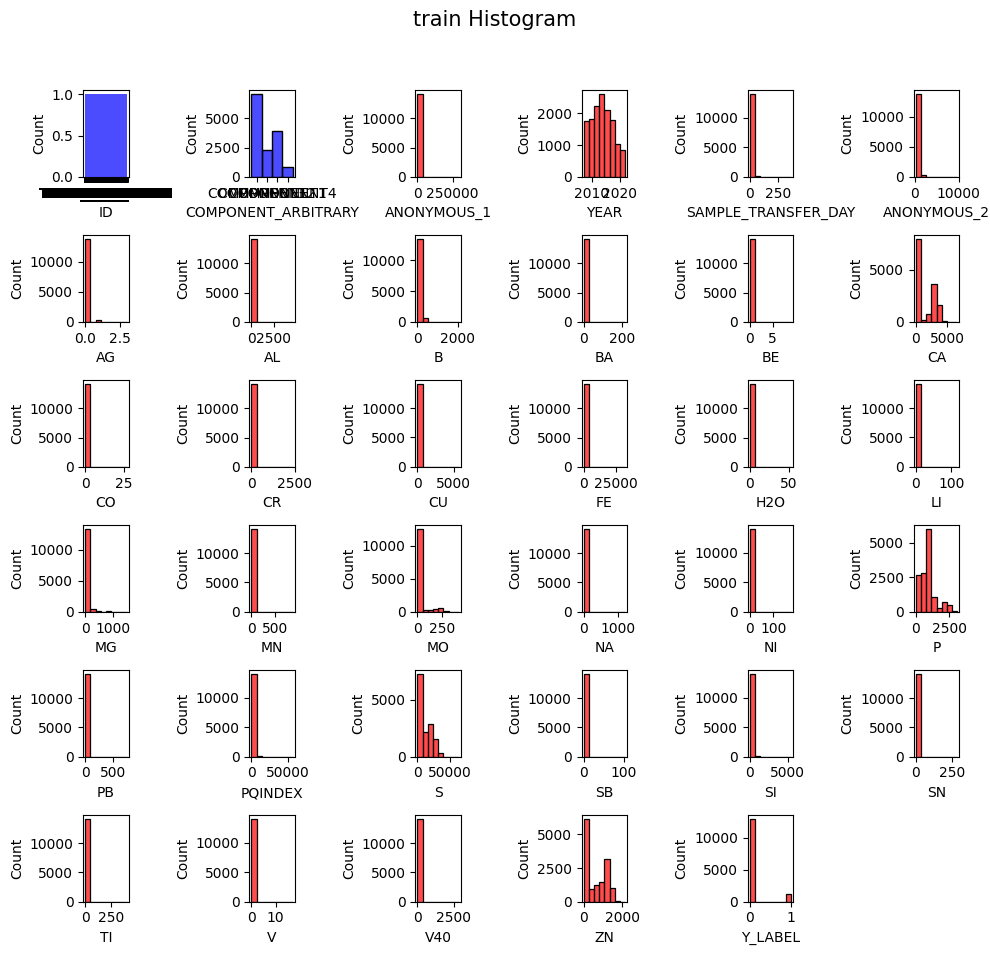

In [41]:
number_type=['int64','float64']

bins=8
plt.figure(figsize=(10,10))
plt.suptitle('train Histogram', fontsize=15)

# cols = train.columns

cols = use_col
subplot_size=int(np.sqrt(len(cols))) + 1

for i in range(len(cols)):
    plt.subplot(subplot_size,subplot_size,i+1)

    if (train[cols[i]].dtypes not in number_type) :
        sns.histplot(data=train, x=cols[i], color='b', bins= bins, alpha=0.7)
        plt.xticks(fontsize=10, rotation=0)

    else:
        sns.histplot(data=train, x=cols[i], color='r', bins=bins, alpha=0.7)
        plt.xticks(fontsize=10, rotation=0)

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

### 정리
- 대체적으로 모든 변수에 이상치가 존재하여 분포를 제대로 확인하기 어렵다
- 'AG', 'BE'는 범주형으로 보여진다
- 2가지 외에도 범주로 보이는건 있으나, 그 수가 많아 라벨 인코딩이 된것으로 보자
- 변수마다 이상치가 있어보이긴 하지만, 실제 측정값이므로 drop은 하지 않는다.

In [ ]:
str_col = ['COMPONENT_ARBITRARY', 'AG', 'BE']


### 결론
- 결측
1. null_col 중, K를 제외한 18개 변수는 사용하지 않는다 (52-18 = 34개 사용)
    - K는 mean으로 대체한다
2. 모델 성능이 안나오면, 결측 대체 방법을 찾아본다

- 전처리
1. 'AG', 'BE','COMPONENT_ARBITRARY' 는 str로 보고 onehotencoding한다
2. 수치형은 이상치를 어느정도 커버할 수 있는 min-max 로 한다